<a href="https://colab.research.google.com/github/Hammerhead04/registrationform/blob/main/COVID-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

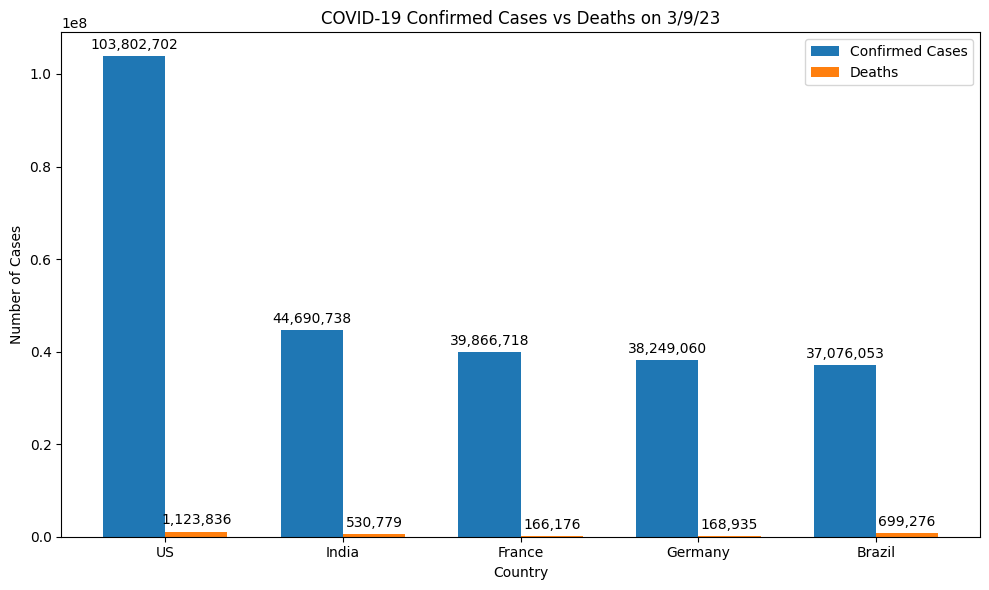

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/' \
      'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(url)
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/' \
             'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths = pd.read_csv(url_deaths)
confirmed = df_confirmed.groupby("Country/Region").sum().drop(columns=["Lat", "Long"])
deaths = df_deaths.groupby("Country/Region").sum().drop(columns=["Lat", "Long"])
latest_date = confirmed.columns[-1]
top_countries = confirmed[latest_date].sort_values(ascending=False).head(5).index
confirmed_top = confirmed.loc[top_countries, latest_date]
deaths_top = deaths.loc[top_countries, latest_date]
import numpy as np
x = np.arange(len(top_countries))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, confirmed_top, width, label='Confirmed Cases')
bars2 = ax.bar(x + width/2, deaths_top, width, label='Deaths')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Cases')
ax.set_title(f'COVID-19 Confirmed Cases vs Deaths on {latest_date}')
ax.set_xticks(x)
ax.set_xticklabels(top_countries)
ax.legend()
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# New Section